In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipelineFour
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2022-03-15 12:42:23.596605


Starting to count rna and dna read positions and contacts
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split0.DNA20RNA20RNAmax300.dna.sort.bam
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split1.DNA20RNA20RNAmax300.dna.sort.bam
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split2.DNA20RNA20RNAmax300.dna.sort.bam
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split3.DNA20RNA20RNAmax300.dna.sort.bam
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split4.DNA20RNA20RNAmax300.dna.sort.bam
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split5.DNA20RNA20RNAmax300.dna.sort.bam
/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split6.DNA20RNA20RNAmax

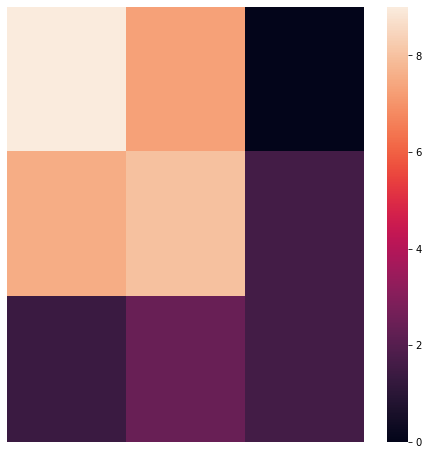

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.sort.gencoords.tsv.40469.20000.pdf


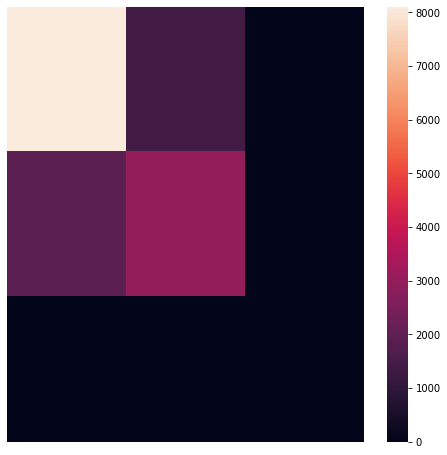

Maximum coordinate length: 40469, Minimum coordinate length: 0, Window size: 5000
9
(9, 9)
Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.sort.gencoords.tsv.40469.5000.log.pdf


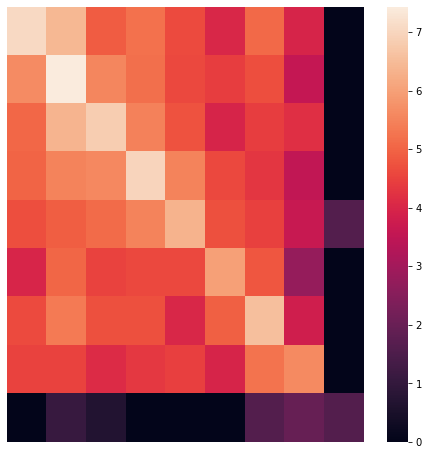

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.sort.gencoords.tsv.40469.5000.pdf


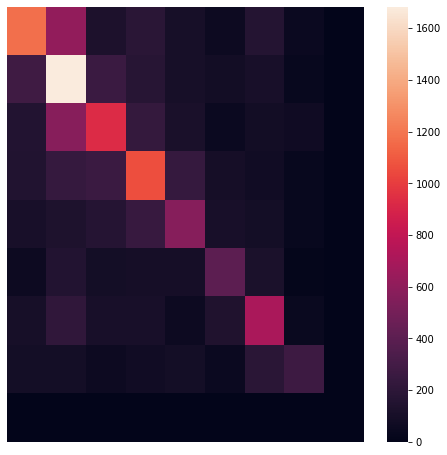

['scaffold51_0', 'scaffold51_1']
Maximum coordinate length: 3000000, Minimum coordinate length: 0, Window size: 5000
600
(600, 600)
Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.sort.gencoords.tsv.3000000.5000.log.pdf


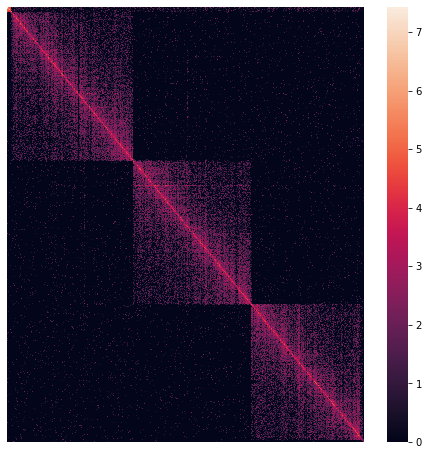

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.sort.gencoords.tsv.3000000.5000.pdf


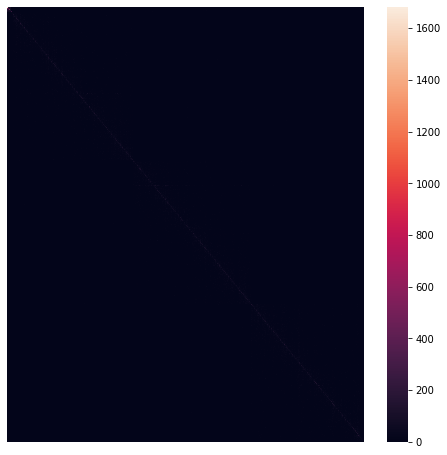

Maximum coordinate length: 75698530, Minimum coordinate length: 0, Window size: 50000
1514
(1514, 1514)
Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.sort.gencoords.tsv.75698530.50000.log.pdf


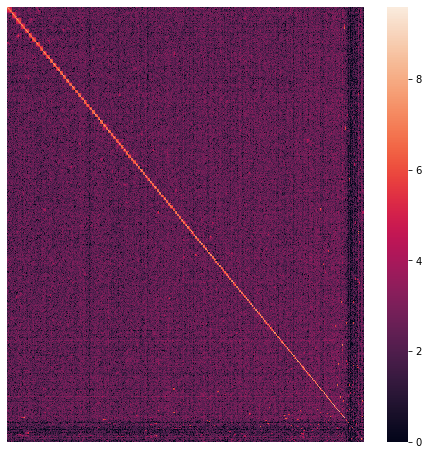

Plotting heatmap
Finished making heatmap: /media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.sort.gencoords.tsv.75698530.50000.pdf


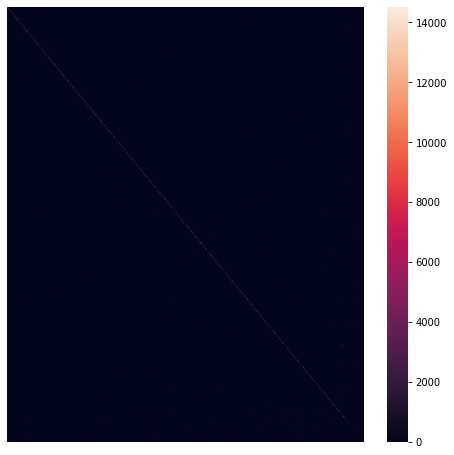

Reading Gff3 file and indexing by scaffold: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3
Features kept: internal_eliminated_sequence
Number of scaffolds: 511
['100', '101', '102', '103', '104', '105', '106', '107', '108', '109']
Count: 0 | Current contact: pt0 1 36 - 4S36M pt81 371367 371435 - 69M 4 A00574:280:HVV7FDRXX:2:2134:19416:33990:1:AAAGG,A00574:280:HVV7FDRXX:2:2147:23439:3286:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25319:35822:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25500:36041:1:AAAGG
Count: 1000000 | Current contact: pt5 462926 462981 - 56M pt58 369243 369405 - 163M 1 A00574:280:HVV7FDRXX:2:2164:13774:15107:1:AAACA
Count: 2000000 | Current contact: pt11 438188 438322 + 135M pt333 6467 6530 + 64M 2 A00574:280:HVV7FDRXX:2:2175:19831:31360:1:AAGGA,A00574:280:HVV7FDRXX:2:2230:16640:1094:1:AAGGA
Count: 3000000 | Current contact: pt18 199935 200032 - 4S98M pt7 474828 474979 - 152M 1 A00574:280:HVV7FDRXX:2:2219:29640:20541:1

In [ ]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R1.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Ciliates/Genomes/Seqs/IESs'  # '/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES_mtDNA'

#altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/EV_E_sRNA20to30bps/pear/WT_L_L1_R1R2.trim.AssUnFUnR.fastq.gz'
altreadfile1 = []
path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
for i in range(251):
    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.dna.sort.bam')
    altreadfile1.append(splitfile)
    
#altreadfile2='/path/to/altreads2.fastq'
altreadfile2 = []
path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
for i in range(251):
    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.rna.sort.bam')
    altreadfile2.append(splitfile)
   
steps=['rnadnacontacts', 'summarizecontacts', 'heatmap', 'contacts in features', 'get sequences', 'blast rna']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'summarizecontacts', 'heatmap', 'contacts in features', 'get sequences']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=1
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2'  #--no-softclip 
# if mapping to Mac+IES
hisat2_args='-p 2 --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'  # --no-softclip 
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa'
PCRDupRemoval=False

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
features=['internal_eliminated_sequence']


zoomscaffname = ''
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]
dnabuffer = 2000
rnabuffer = 15
rnamatch = 15
maxgapoverlap = 0.75

CharSeqPipelineFour.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, dnabuffer, rnabuffer, rnamatch, maxgapoverlap, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features)


In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipelineFour
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2022-03-15 19:23:17.587174


In [2]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Ciliates/Genomes/Seqs/IESs'  # '/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES_mtDNA'

altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.insidefeatures.dnabuff2000.rnabuff15.match15.gap0.75.txt'
#altreadfile1 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.dna.sort.bam')
#    altreadfile1.append(splitfile)
#    
altreadfile2='/path/to/altreads2.fastq'
#altreadfile2 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.rna.sort.bam')
#    altreadfile2.append(splitfile)
   
steps=['get sequences']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'summarizecontacts', 'heatmap', 'contacts in features', 'get sequences']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=1
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2'  #--no-softclip 
# if mapping to Mac+IES
hisat2_args='-p 2 --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'  # --no-softclip 
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa'
PCRDupRemoval=False

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
features=['internal_eliminated_sequence']


zoomscaffname = ''
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]
dnabuffer = 2000
rnabuffer = 15
rnamatch = 15
maxgapoverlap = 0.75

CharSeqPipelineFour.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, dnabuffer, rnabuffer, rnamatch, maxgapoverlap, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features)


['/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split0.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split1.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split10.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split100.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split101.DNA20RNA20RNAmax300.rna.fastq.gz']
251
Total Number of RNAs (after pear, before alignment): 71100751
Total strength of all contacts in all features: 25583
Number of unique rna sequences from contacts in features: 25583
Number of unique short rna sequences (<=30bps) from contacts in features: 497
Number of unique short rna sequences (>=25

In [5]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipelineFour
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-03-16 17:04:04.978808


In [ ]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Ciliates/Genomes/Seqs/IESs'  # '/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES_mtDNA'

altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.txt'
#altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.insidefeatures.dnabuff2000.rnabuff15.match15.gap0.75.txt'
#altreadfile1 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.dna.sort.bam')
#    altreadfile1.append(splitfile)
#    
altreadfile2='/path/to/altreads2.fastq'
#altreadfile2 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.rna.sort.bam')
#    altreadfile2.append(splitfile)
   
steps=['contacts in features', 'get sequences']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'summarizecontacts', 'heatmap', 'contacts in features', 'get sequences']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=1
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2'  #--no-softclip 
# if mapping to Mac+IES
hisat2_args='-p 2 --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'  # --no-softclip 
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa'
PCRDupRemoval=False

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.MDS.gff3'
features=['mds']


zoomscaffname = ''
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]
dnabuffer = 0
rnabuffer = 0
rnamatch = 20
maxgapoverlap = 0.25

CharSeqPipelineFour.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, dnabuffer, rnabuffer, rnamatch, maxgapoverlap, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features)


Reading Gff3 file and indexing by scaffold: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.MDS.gff3
Features kept: mds
Number of scaffolds: 697
['100', '101', '102', '103', '104', '105', '106', '107', '108', '109']
Count: 0 | Current contact: pt0 1 36 - 4S36M pt81 371367 371435 - 69M 4 A00574:280:HVV7FDRXX:2:2134:19416:33990:1:AAAGG,A00574:280:HVV7FDRXX:2:2147:23439:3286:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25319:35822:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25500:36041:1:AAAGG
Count: 1000000 | Current contact: pt5 462926 462981 - 56M pt58 369243 369405 - 163M 1 A00574:280:HVV7FDRXX:2:2164:13774:15107:1:AAACA
Count: 2000000 | Current contact: pt11 438188 438322 + 135M pt333 6467 6530 + 64M 2 A00574:280:HVV7FDRXX:2:2175:19831:31360:1:AAGGA,A00574:280:HVV7FDRXX:2:2230:16640:1094:1:AAGGA
Count: 3000000 | Current contact: pt18 199935 200032 - 4S98M pt7 474828 474979 - 152M 1 A00574:280:HVV7FDRXX:2:2219:29640:20541:1:AAACG
Count: 4000000

In [16]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipelineFour
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2022-03-16 22:26:27.343448


In [17]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Ciliates/Genomes/Seqs/IESs'  # '/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES_mtDNA'

#altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.txt'
altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.insidefeatures.dnabuff0.rnabuff0.match20.gap0.25.txt'
#altreadfile1 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.dna.sort.bam')
#    altreadfile1.append(splitfile)
#    
altreadfile2='/path/to/altreads2.fastq'
#altreadfile2 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.rna.sort.bam')
#    altreadfile2.append(splitfile)
   
steps=['get sequences']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'summarizecontacts', 'heatmap', 'contacts in features', 'get sequences']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=1
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2'  #--no-softclip 
# if mapping to Mac+IES
hisat2_args='-p 2 --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'  # --no-softclip 
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa'
PCRDupRemoval=False

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.MDS.gff3'
features=['mds']


zoomscaffname = ''
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]
dnabuffer = 0
rnabuffer = 0
rnamatch = 20
maxgapoverlap = 0.25

CharSeqPipelineFour.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, dnabuffer, rnabuffer, rnamatch, maxgapoverlap, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features)


['/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split0.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split1.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split10.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split100.DNA20RNA20RNAmax300.rna.fastq.gz', '/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/pear/PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split101.DNA20RNA20RNAmax300.rna.fastq.gz']
251
Retrieved sequences from 1 files
Retrieved sequences from 2 files
Retrieved sequences from 3 files
Retrieved sequences from 4 files
Retrieved sequences from 5 files
Retrieved sequences from 6 files
Retrieved sequences from 7 files
Retrieved sequences from 8 files
Retrieved sequences from 9 files
Ret

In [1]:
%load_ext autoreload
%autoreload 2
import datetime
import os
print(datetime.datetime.now())

from pygentoolbox import CharSeqPipelineFour
# from pygentoolbox.Tools import read_interleaved_fasta_as_noninterleaved
# from pygentoolbox.Tools import make_circos_karyotype_file
#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt

2022-03-24 14:59:47.823592


In [9]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Ciliates/Genomes/Seqs/IESs'  # '/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES_mtDNA'

altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.txt'
#altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.insidefeatures.dnabuff0.rnabuff0.match20.gap0.25.txt'
#altreadfile1 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.dna.sort.bam')
#    altreadfile1.append(splitfile)
#    
altreadfile2='/path/to/altreads2.fastq'
#altreadfile2 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.rna.sort.bam')
#    altreadfile2.append(splitfile)
   
steps=['trans rna']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'summarizecontacts', 'heatmap', 'contacts in features', 'get sequences']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=1
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2'  #--no-softclip 
# if mapping to Mac+IES
hisat2_args='-p 2 --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'  # --no-softclip 
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa'
PCRDupRemoval=False

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
features=['internal_eliminated_sequence']


zoomscaffname = ''
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]
dnabuffer = 1000
rnabuffer = 0
rnamatch = 20
maxgapoverlap = 0.25
rnalocation = [387, 20, 6208]  # add 223 to 5985 (=) because 223 extra bases are added to the Mac+IES genome as IESs inside of the lnc1 coordinates for the Mac 
                               # no IESs inside the lnc15 coordinates, so don't need to change them
CharSeqPipelineFour.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, dnabuffer, rnabuffer, rnamatch, maxgapoverlap, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features, rnalocation)


Reading Gff3 file and indexing by scaffold: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3
Features kept: internal_eliminated_sequence
Number of scaffolds: 511
['100', '101', '102', '103', '104', '105', '106', '107', '108', '109']
Count: 0 | Current contact: pt0 1 36 - 4S36M pt81 371367 371435 - 69M 4 A00574:280:HVV7FDRXX:2:2134:19416:33990:1:AAAGG,A00574:280:HVV7FDRXX:2:2147:23439:3286:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25319:35822:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25500:36041:1:AAAGG
Count: 1000000 | Current contact: pt5 462926 462981 - 56M pt58 369243 369405 - 163M 1 A00574:280:HVV7FDRXX:2:2164:13774:15107:1:AAACA
Count: 2000000 | Current contact: pt11 438188 438322 + 135M pt333 6467 6530 + 64M 2 A00574:280:HVV7FDRXX:2:2175:19831:31360:1:AAGGA,A00574:280:HVV7FDRXX:2:2230:16640:1094:1:AAGGA
Count: 3000000 | Current contact: pt18 199935 200032 - 4S98M pt7 474828 474979 - 152M 1 A00574:280:HVV7FDRXX:2:2219:29640:20541:1

In [10]:
# char_bridge_tools.py requires python2 i'm running python 2.7.17
# pip install Python-Levenshtein
# pip install biopython
# RecordRNADNAContacts.py uses python3 i'm running python 3.7 anaconda
# pip install natsort
forwardreadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R1.fastq.gz'
reversereadfile='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/PGM_L_L1_R2.fastq.gz'
blastdatabase='/media/sf_LinuxShare/Ciliates/Genomes/Seqs/IESs'  # '/media/sf_LinuxShare/Humans/Genome/Seqs/GRCh38_top_level.fa'
aligndatabase='/media/sf_LinuxShare/Ciliates/Genomes/Hisat2_Indexes/Pt_51_MacAndIES_mtDNA'

altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.txt'
#altreadfile1='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/RNA.DNA.Contacts.Unique.Strength.AllSeqNames.sort.insidefeatures.dnabuff0.rnabuff0.match20.gap0.25.txt'
#altreadfile1 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.dna.sort.bam')
#    altreadfile1.append(splitfile)
#    
altreadfile2='/path/to/altreads2.fastq'
#altreadfile2 = []
#path ='/media/sf_LinuxShare/Projects/Lyna/CharSeqPipe/PGM_L/hisat2/'
#for i in range(251):
#    splitfile = os.path.join(path, f'PGM_L_S2_L002_R1_R1R2.trim.AssUnFUnR.split{i}.DNA20RNA20RNAmax300.rna.sort.bam')
#    altreadfile2.append(splitfile)
   
steps=['trans rna']
# steps=['fastp', 'fastqc', 'pear', 'mergefiles', 'split2chunks', 'charbridge', 'fastq2fasta', 'blast', 'hisat2', 'samtools', 'rnadnacontacts', 'summarizecontacts', 'heatmap', 'contacts in features', 'get sequences']
rnalen=20
dnalen=20
rnamaxlen=300
REsequence='GATC'
windowsize=300
contactcutoff=1
MQ=1
sn='Paramecium tetraurelia'

# if mapping to Mac
# hisat2_args='-p 2'  #--no-softclip 
# if mapping to Mac+IES
hisat2_args='-p 2 --pen-noncansplice 0 --known-splicesite-infile /media/sf_LinuxShare/Ciliates/Genomes/Annotations/ss.IES.pt_51_MacAndIES.tsv'  # --no-softclip 
genomefile = '/media/sf_LinuxShare/Ciliates/Genomes/Seqs/ptetraurelia_mac_51_with_ies_with_mtDNA.fa'
PCRDupRemoval=False

# ptetraurelia_mac_51_annotation_v2.0.gff3
annot_file = '/media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
features=['internal_eliminated_sequence']


zoomscaffname = ''
zoomwinsize = 50
scaffcoordmin, scaffcoordmax = [219999, 354999, 474999, 629999, 839999], [239999, 374999, 484999, 649999, 859999]
dnabuffer = 1000
rnabuffer = 0
rnamatch = 20
maxgapoverlap = 0.25
rnalocation = [357, 21, 979]

CharSeqPipelineFour.main(forwardreadfile, reversereadfile, blastdatabase, aligndatabase, altreadfile1, altreadfile2, steps, rnalen, dnalen, rnamaxlen, REsequence, windowsize, contactcutoff, MQ, dnabuffer, rnabuffer, rnamatch, maxgapoverlap, sn, hisat2_args, genomefile, PCRDupRemoval, annot_file, zoomscaffname, zoomwinsize, scaffcoordmin, scaffcoordmax, features, rnalocation)


Reading Gff3 file and indexing by scaffold: /media/sf_LinuxShare/Ciliates/Genomes/Annotations/internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3
Features kept: internal_eliminated_sequence
Number of scaffolds: 511
['100', '101', '102', '103', '104', '105', '106', '107', '108', '109']
Count: 0 | Current contact: pt0 1 36 - 4S36M pt81 371367 371435 - 69M 4 A00574:280:HVV7FDRXX:2:2134:19416:33990:1:AAAGG,A00574:280:HVV7FDRXX:2:2147:23439:3286:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25319:35822:1:AAAGG,A00574:280:HVV7FDRXX:2:2216:25500:36041:1:AAAGG
Count: 1000000 | Current contact: pt5 462926 462981 - 56M pt58 369243 369405 - 163M 1 A00574:280:HVV7FDRXX:2:2164:13774:15107:1:AAACA
Count: 2000000 | Current contact: pt11 438188 438322 + 135M pt333 6467 6530 + 64M 2 A00574:280:HVV7FDRXX:2:2175:19831:31360:1:AAGGA,A00574:280:HVV7FDRXX:2:2230:16640:1094:1:AAGGA
Count: 3000000 | Current contact: pt18 199935 200032 - 4S98M pt7 474828 474979 - 152M 1 A00574:280:HVV7FDRXX:2:2219:29640:20541:1